## **Scraping data about US mass shootings**

In [1]:
import requests
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import seaborn as sns
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException

In [24]:
def get_data(webpage):
    
    all_data = []
    #connection
    s = Service('C:\webdrivers\chromedriver.exe')
    driver = webdriver.Chrome(service=s)
    driver.get(webpage)
    
    while True:
        
        time.sleep(3)
        all_rows = driver.find_elements(By.XPATH,'.//table[@class="responsive sticky-enabled tableheader-processed sticky-table"]//tbody//tr')

        for each_row in all_rows:
            incident_date = each_row.find_element(By.XPATH,'(.//td)[2]').text.strip()
            incident_state = each_row.find_element(By.XPATH,'(.//td)[3]').text.strip()
            incident_city = each_row.find_element(By.XPATH,'(.//td)[4]').text.strip()
            incident_victims_killed = each_row.find_element(By.XPATH,'(.//td)[6]').text.strip()
            incident_victims_injured = each_row.find_element(By.XPATH,'(.//td)[7]').text.strip()
            incident_suspects_killed = each_row.find_element(By.XPATH,'(.//td)[8]').text.strip()
            incident_suspects_injured = each_row.find_element(By.XPATH,'(.//td)[9]').text.strip()
            incident_suspects_arrested = each_row.find_element(By.XPATH,'(.//td)[10]').text.strip()
            all_data.append({'date':incident_date,
                             'state':incident_state,
                             'city':incident_city,
                             'victims_killed':incident_victims_killed,
                             'victims_injured':incident_victims_injured,
                             'suspects_killed':incident_suspects_killed,
                             'suspects_injured':incident_suspects_injured,
                             'suspects_arrested':incident_suspects_arrested})
            
        #switch to next page
        try:
            next_page = driver.find_element(By.XPATH,'//li[@class="pager-next"]//a')
            next_page.click()
        except NoSuchElementException:
            break
    
    driver.quit()
    return all_data


<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\piotr\AppData\Local\Temp\ipykernel_5092\3969484581.py:5: SyntaxWarning: invalid escape sequence '\w'
  s = Service('C:\webdrivers\chromedriver.exe')


In [25]:
df = get_data('https://www.gunviolencearchive.org/reports/mass-shooting')

In [27]:
df

[{'date': 'August 14, 2024',
  'state': 'Virginia',
  'city': 'Petersburg',
  'victims_killed': '0',
  'victims_injured': '4',
  'suspects_killed': '0',
  'suspects_injured': '0',
  'suspects_arrested': '2'},
 {'date': 'August 14, 2024',
  'state': 'Texas',
  'city': 'San Antonio',
  'victims_killed': '0',
  'victims_injured': '5',
  'suspects_killed': '0',
  'suspects_injured': '0',
  'suspects_arrested': '0'},
 {'date': 'August 14, 2024',
  'state': 'Colorado',
  'city': 'Colorado Springs',
  'victims_killed': '1',
  'victims_injured': '3',
  'suspects_killed': '0',
  'suspects_injured': '0',
  'suspects_arrested': '0'},
 {'date': 'August 13, 2024',
  'state': 'Massachusetts',
  'city': 'Lawrence',
  'victims_killed': '1',
  'victims_injured': '3',
  'suspects_killed': '0',
  'suspects_injured': '0',
  'suspects_arrested': '0'},
 {'date': 'August 12, 2024',
  'state': 'Illinois',
  'city': 'Chicago',
  'victims_killed': '0',
  'victims_injured': '4',
  'suspects_killed': '0',
  'susp

In [29]:
df = pd.DataFrame(df)

In [30]:
df

,date,state,city,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested
0,"August 14, 2024",Virginia,Petersburg,0,4,0,0,2
1,"August 14, 2024",Texas,San Antonio,0,5,0,0,0
2,"August 14, 2024",Colorado,Colorado Springs,1,3,0,0,0
3,"August 13, 2024",Massachusetts,Lawrence,1,3,0,0,0
4,"August 12, 2024",Illinois,Chicago,0,4,0,0,0
...,...,...,...,...,...,...,...,...
343,"January 4, 2024",Iowa,Perry,2,5,1,0,0
344,"January 1, 2024",Missouri,Springfield,0,4,0,0,1
345,"January 1, 2024",Louisiana,Baton Rouge,1,3,0,0,3
346,"January 1, 2024",California,Los Angeles,2,8,0,0,0


In [32]:
df.dtypes

date                 object
state                object
city                 object
victims_killed       object
victims_injured      object
suspects_killed      object
suspects_injured     object
suspects_arrested    object
dtype: object

In [34]:
df.iloc[:,3:].columns.to_list()

['victims_killed',
 'victims_injured',
 'suspects_killed',
 'suspects_injured',
 'suspects_arrested']

In [35]:
df['date'] = pd.to_datetime(df['date'])

for col in df.iloc[:,3:].columns.to_list():
    df[col] = pd.to_numeric(df[col])

In [37]:
df.dtypes

date                 datetime64[ns]
state                        object
city                         object
victims_killed                int64
victims_injured               int64
suspects_killed               int64
suspects_injured              int64
suspects_arrested             int64
dtype: object

In [38]:
df

,date,state,city,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested
0,2024-08-14,Virginia,Petersburg,0,4,0,0,2
1,2024-08-14,Texas,San Antonio,0,5,0,0,0
2,2024-08-14,Colorado,Colorado Springs,1,3,0,0,0
3,2024-08-13,Massachusetts,Lawrence,1,3,0,0,0
4,2024-08-12,Illinois,Chicago,0,4,0,0,0
...,...,...,...,...,...,...,...,...
343,2024-01-04,Iowa,Perry,2,5,1,0,0
344,2024-01-01,Missouri,Springfield,0,4,0,0,1
345,2024-01-01,Louisiana,Baton Rouge,1,3,0,0,3
346,2024-01-01,California,Los Angeles,2,8,0,0,0


In [42]:
df['day'] = df['date'].dt.day_of_week
df['month'] = df['date'].dt.month

In [58]:
df_group_month = df.groupby(["month"])[["victims_killed","victims_injured","suspects_killed","suspects_injured","suspects_arrested"]].sum().reset_index().iloc[:-1,:]

In [59]:
df_group_month

,month,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested
0,1,69,111,4,1,27
1,2,36,109,3,3,30
2,3,36,141,2,4,36
3,4,29,173,4,1,33
4,5,49,215,5,5,52
5,6,57,373,4,5,34
6,7,65,298,4,5,25


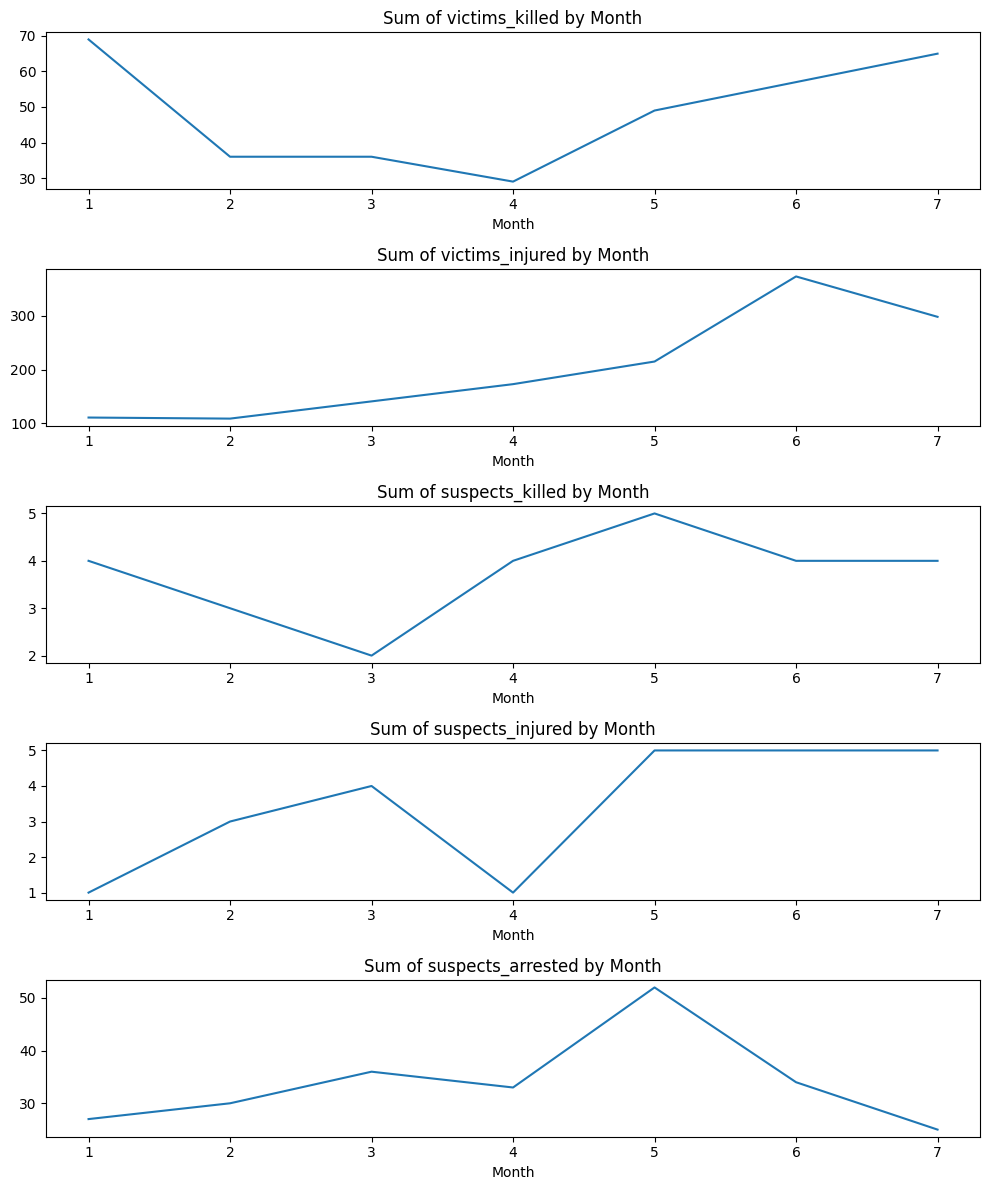

In [68]:
fig, axes = plt.subplots(ncols = 1, nrows = 5, figsize = (10,12))
axes = axes.flatten()

for ind, col in enumerate(df_group_month.select_dtypes(np.number).columns.to_list()[1:]):
    
    sns.lineplot(data = df_group_month,
                x = "month",
                y = col,
                ax = axes[ind])
    axes[ind].set_title(f"Sum of {col} by Month")
    axes[ind].set_xlabel("Month")
    axes[ind].set_ylabel("")

plt.tight_layout()
plt.show()